In [19]:
from transformers import AutoTokenizer

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def stats(e):
    print('mean:', np.mean(e))
    print('std:', np.std(e))
    print('min:', np.min(e))
    print('max:', np.max(e))

In [20]:
# load tokenizer
model_name = "bigscience/T0_3B"
tokenizer = AutoTokenizer.from_pretrained(
    model_name, cache_dir="/pre-trained-transformers"
)

Downloading:   0%|          | 0.00/632 [00:00<?, ?B/s]

In [21]:
tokenizer._convert_id_to_token(1)

'</s>'

In [3]:
# load <pad> and </s> embeddings
pad = np.load("/logfiles/embeddings/pad.npy")
eos = np.load("/logfiles/embeddings/eos.npy")

In [4]:
# sanity check
E = np.load("/logfiles/embeddings/embedding_matrix.npy")
print(E.shape)
assert E[0].all() == pad.all()
assert E[1].all() == eos.all()

(32128, 2048)


In [5]:
stats(E[0])

mean: 0.4172142
std: 5.0878687
min: -66.0
max: 46.5


In [6]:
stats(E[1])

mean: -0.22131178
std: 6.924052
min: -54.25
max: 65.5


In [55]:
stats(E[3])

mean: 0.18051407
std: 5.8433967
min: -144.0
max: 58.5


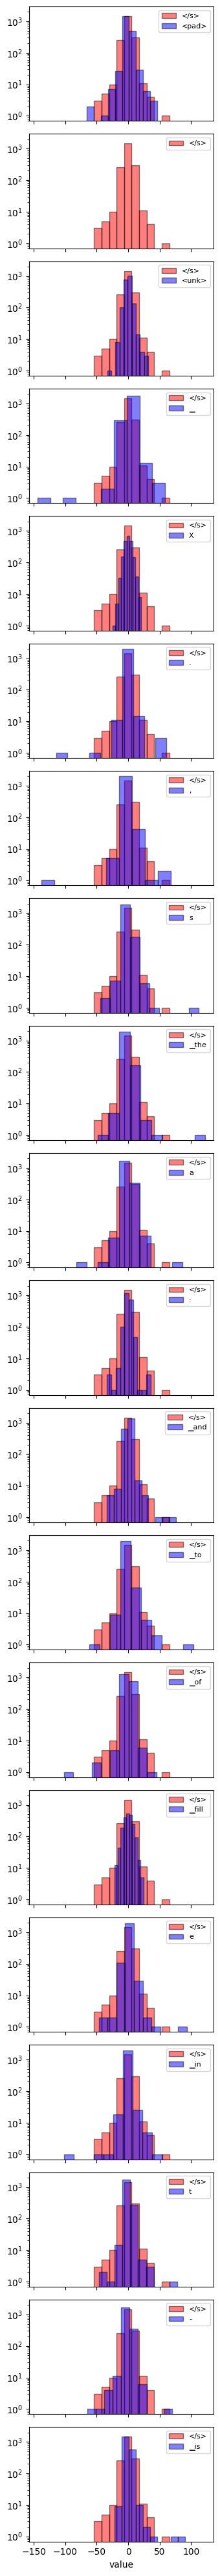

In [54]:
# visualize emebddings as a heatmap
num_embeddings = 20

fig, axes = plt.subplots(num_embeddings, 1, sharex=True, sharey=True, figsize=(3.5,num_embeddings*2), dpi=100)

for i in range(num_embeddings):
    if i == 1:
        color = 'red'
    else:
        color = 'blue'
    if i != 1:
        axes[i].hist(E[1], log=True, alpha=0.5, color='red', edgecolor='black', linewidth=1, label=f"{tokenizer._convert_id_to_token(1)}")

    axes[i].hist(E[i], log=True, alpha=0.5, color=color, edgecolor='black', linewidth=1, label=f"{tokenizer._convert_id_to_token(i)}")
    
    axes[i].legend(loc="best", fontsize=8)

# axes[i].set_ylabel('number of dims')
axes[num_embeddings-1].set_xlabel('value')
# axes[num_embeddings-1].set_xlim(-150, 150)

plt.tight_layout()
plt.show()
plt.close();